In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings('ignore')

In [2]:
lead = pd.read_csv('../01.Data_Collection/actor_leading_role.csv')
box = pd.read_csv('../01.Data_Collection/boxoffice.csv')

In [3]:
lead.head()

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
0,서도철,20148048,베테랑,황정민,배우,10090290,남자
1,안옥윤,20148851,암살,전지현,배우,10061467,여자
2,안상구,20149314,내부자들,이병헌,배우,10055626,남자
3,NaN,20145503,검은 사제들,김윤석,배우,10005276,남자
4,NaN,20148846,사도,송강호,배우,10037018,남자


In [4]:
sex = lead['sex'].value_counts()
sex

남자    501
여자    269
Name: sex, dtype: int64

In [5]:
sex_proportion = sex / len(lead)
sex_proportion

남자    0.650649
여자    0.349351
Name: sex, dtype: float64

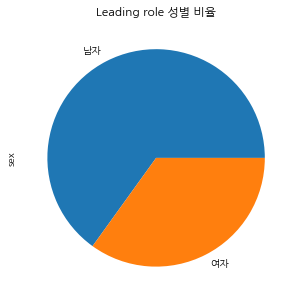

In [6]:
sex_proportion.plot.pie(title='Leading role 성별 비율', figsize=(5,5))
plt.show()

In [8]:
box.head(3)

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,55,워킹걸,2015.1.7,"1,183,887,479",0.1%,"1,201,963,479","149,181","151,550",308,"7,076",한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬..."
1,121,설해,2015.1.8,"20,767,500",0.0%,"29,770,500","2,796","3,933",34,335,한국,한국,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",12세이상관람가,"멜로/로맨스,드라마",김정권,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재..."
2,26,허삼관,2015.1.14,"7,408,943,569",0.8%,"7,408,943,569","955,679","955,679",621,"27,645",한국,한국,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,드라마,하정우,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균..."


In [9]:
len(box)

802

In [10]:
# 박스오피스 테이블 안에 같은 제목을 가진 영화는 없다.
box['영화명'].nunique()

802

In [11]:
# 영화명으로 merge
merged = box.merge(lead, how='left', left_on='영화명', right_on='movieNm')

In [17]:
merged.head(1)

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
0,55,워킹걸,2015.1.7,"1,183,887,479",0.1%,"1,201,963,479","149,181","151,550",308,"7,076",...,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",NaN,20147947.0,워킹걸,조여정,배우,10066680.0,여자


In [15]:
merged.isnull().sum()

순위             0
영화명            0
개봉일            0
매출액            0
매출액점유율         0
누적매출액          0
관객수            0
누적관객수          0
스크린수           0
상영횟수           0
대표국적           0
국적             0
제작사           20
배급사            1
등급             0
장르             0
감독             3
배우            31
cast         462
movieCd       60
movieNm       60
peopleNm      60
repRoleNm     60
peopleCd      60
sex           60
dtype: int64

In [18]:
# 'movieNm' 결측치가 32개여야 하는데 60개 -> 박스오피스 데이터에 없는데 우리가 긁어온 데이터에는 있는 영화가 있다는 건데 대체 왜?
len(box) - len(lead)

32

In [21]:
# outer merge를 해 보자.
outer_merged = box.merge(lead, how='outer', left_on='영화명', right_on='movieNm')

In [22]:
len(outer_merged)

830

In [23]:
outer_merged.isnull().sum()

순위            28
영화명           28
개봉일           28
매출액           28
매출액점유율        28
누적매출액         28
관객수           28
누적관객수         28
스크린수          28
상영횟수          28
대표국적          28
국적            28
제작사           48
배급사           29
등급            28
장르            28
감독            31
배우            59
cast         483
movieCd       60
movieNm       60
peopleNm      60
repRoleNm     60
peopleCd      60
sex           60
dtype: int64

In [24]:
# leading role 테이블에만 있는 영화
outer_merged[outer_merged['영화명'].isnull()]['movieNm']

802                     태양을 쏴라 무삭제판
803                       위선자들: 감독판
804                    성난 화가 - 무삭제판
805                        용주골-무삭제판
806                       포장마차-무삭제판
807                 미궁: 비밀애 무삭제 특별판
808                       유부녀들(무삭제)
809                  내 친구의 아내 (무삭제)
810    나도 때론 포르노그라피의 주인공이고 싶다 : 감독판
811                        아가씨(확장판)
812             우리에게 떡볶이를 먹을 권리가 있다
813                            치킨게임
814                     하숙집 2 (무삭제)
815                            러브레따
816                개인교수: 심화학습 (무삭제)
817                    동거의 목적(무삭제판)
818                  뜨거운 이웃 무삭제 감독판
819                           문영 단편
820                     왕을 참하라 무삭제판
821                       비스티걸스 감독판
822                          덫 무삭제판
823                         군함도 감독판
824                     착한 형수 2 무삭제
825                          재혼의 기술
826                          오늘도 위위
827                        북간도의 십자가
828                  1919유관순-그녀들의조국
829                        8

In [25]:
# boxoffice 테이블에만 있는 영화
outer_merged[outer_merged['movieNm'].isnull()]['영화명']

26                       태양을 쏴라
34          다이빙벨: 진실은 침몰하지 않습니다
36                      미궁: 비밀애
44                    잡식가족의 딜레마
59                        성난 화가
74                       밀양 아리랑
82                 에스엠타운 더 스테이지
108                        포장마차
111                        유부녀들
116                        오디세오
125                      울보 권투부
131      나도 때론 포르노그라피의 주인공이고 싶다
134                         용주골
144                        위선자들
146                    내 친구의 아내
147                      감금의 시간
150                      불안한 외출
161               나의 아들, 나의 어머니
164                       하숙집 2
168                       거미의 땅
172       극장판 꼬마버스 타요의 에이스 구출작전
175                      뜨거운 이웃
185                  개인교수: 심화학습
188                          귀향
195                    방 안의 코끼리
207                      동거의 목적
210                        입영전야
233                        드롭박스
238                         아가씨
242                       시선 사이
243                      소녀와 여자
246     

In [27]:
outer_merged[outer_merged['영화명']=='아가씨']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
238,11.0,아가씨,2016.6.1,"35,211,229,991",3.8%,"35,211,229,991","4,287,839","4,287,839","1,171","90,365",...,"스릴러,드라마",박찬욱,"김민희,김태리,하정우,조진웅,김해숙,문소리,최병모,김인우,이용녀,조은형,장한순,이규...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
outer_merged[outer_merged['movieNm']=='아가씨(확장판)']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,아가씨,20167301.0,아가씨(확장판),김민희,배우,10004236.0,여자


In [ ]:
# 확장판, 무삭제판 같은 부연설명을 떼고 다시 붙여봐야겠음.